In [48]:
import pickle
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
    
Pkl_Filename_RF = "Pickle_RF.pkl"

with open(Pkl_Filename_RF, 'rb') as file:
    best_RF_model= pickle.load(file)
# My final system in my report is the random forest model which achieves largeest recall, 
# accuracy, precision, and AUC score. 

In [49]:
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.865
precision is: 0.7818930041152263
recall is: 0.4668304668304668


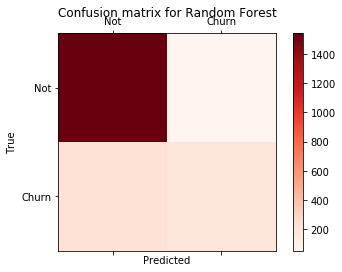

In [50]:
churn_df = pd.read_csv('/Users/phoebeyang/Desktop/USC_Fall2020/EE-660/HW/HW6&Project/Churn project/Churn_Modelling.csv')
churn_df['Gender'] = churn_df['Gender'] == 'Female'
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=False)
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)
y = churn_df['Exited']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, stratify = y, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ]

draw_confusion_matrices(confusion_matrices)

    


In [51]:
confusion_matrix(y_test,best_RF_model.predict(X_test))

array([[1540,   53],
       [ 217,  190]])

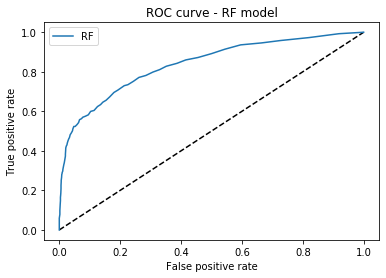

0.8375555833182952

In [52]:
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()
# AUC score
metrics.auc(fpr_rf,tpr_rf)

In [54]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2398
EstimatedSalary : 0.1468
CreditScore : 0.1437
Balance : 0.1411
NumOfProducts : 0.1285
Tenure : 0.082
IsActiveMember : 0.0416
Geography_Germany : 0.0202
Gender : 0.0194
HasCrCard : 0.0181
Geography_France : 0.0102
Geography_Spain : 0.0085
